In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/DataIntelligenceApplications/')

Mounted at /content/drive


---
Step 5 with the complete environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from data_generators.standard_generator import StandardDataGenerator
from environments.complete_environment import CompleteEnvironment
from learners.GTS_Learner import GTS_Learner
from learners.GPTS_Learner_v3 import GPTS_Learner

In [3]:
src = 'src/basic005.json'
dg = StandardDataGenerator(src)

In [4]:
sel_price = 4
print('\n', 15 * '-', 'SIMULATION PARAMS', '-' * 15)
T = 365
n_experiments = 5
print(f'Time horizon: {T} days')
print(f'Num. experiments: {n_experiments}')


 --------------- SIMULATION PARAMS ---------------
Time horizon: 365 days
Num. experiments: 5


In [5]:
dg = StandardDataGenerator(src)
for bid in range(0, len(dg.get_bids())):
  conv_rate = dg.get_conversion_rates(mode='aggregate', bid=bid)[sel_price]
  tau = dg.get_future_purchases(mode='aggregate', bid=bid)[sel_price]
  cpc = dg.get_costs_per_click(mode='aggregate', bid=bid)[bid]
  exp = dg.get_daily_clicks(mode='aggregate')[bid] * (conv_rate * dg.get_margins()[sel_price] * (1 + tau) - cpc)
  print(f'BID: {bid}')
  print(f'\t- conv_rate={conv_rate},')
  print(f'\t- tau={tau},')
  print(f'\t- cpc={cpc},')

BID: 0
	- conv_rate=0.178,
	- tau=0.868,
	- cpc=0.295,
BID: 1
	- conv_rate=0.176,
	- tau=0.839,
	- cpc=0.343,
BID: 2
	- conv_rate=0.173,
	- tau=0.814,
	- cpc=0.391,
BID: 3
	- conv_rate=0.17,
	- tau=0.772,
	- cpc=0.486,
BID: 4
	- conv_rate=0.167,
	- tau=0.739,
	- cpc=0.58,
BID: 5
	- conv_rate=0.163,
	- tau=0.703,
	- cpc=0.719,
BID: 6
	- conv_rate=0.16,
	- tau=0.678,
	- cpc=0.856,
BID: 7
	- conv_rate=0.159,
	- tau=0.665,
	- cpc=0.946,
BID: 8
	- conv_rate=0.157,
	- tau=0.642,
	- cpc=1.168,
BID: 9
	- conv_rate=0.155,
	- tau=0.628,
	- cpc=1.383,


In [6]:
#learners_to_test = [GTS_Learner, GPTS_Learner]
learners_to_test = [GTS_Learner]
rewards_per_experiment = {}
for learner in learners_to_test:
    rewards_per_experiment[learner.LEARNER_NAME] = []

In [7]:
for e in range(n_experiments):
    print(f'running experiment {e + 1}/{n_experiments}...\n')
    test_instances = []
    for learner in learners_to_test:
        test_instances.append((learner(dg.get_bids()),
                               CompleteEnvironment(src=src)))
    for t in range(T):
        for learner, env in test_instances:
            sel_bid = learner.pull_arm()
            out = env.day_round(sel_price, sel_bid, fixed_price=True)
            print(f'DAY {t}:\n\t sel_bid={sel_bid},\n\t out={out}')
            learner.update(sel_bid, out)
    for learner, _ in test_instances:
        rewards_per_experiment[learner.LEARNER_NAME].append(learner.daily_collected_rewards)

Streaming output truncated to the last 5000 lines.
DAY 161:
	 sel_bid=1,
	 out={'n_clicks': 408.0, 'cpc': 0.3443161764705882, 'margin': 7, 'tau': 0.839, 'conv_rates': 0.176}
DAY 162:
	 sel_bid=1,
	 out={'n_clicks': 402.0, 'cpc': 0.3458955223880597, 'margin': 7, 'tau': 0.839, 'conv_rates': 0.176}
DAY 163:
	 sel_bid=1,
	 out={'n_clicks': 404.0, 'cpc': 0.34131435643564356, 'margin': 7, 'tau': 0.839, 'conv_rates': 0.176}
DAY 164:
	 sel_bid=1,
	 out={'n_clicks': 402.0, 'cpc': 0.3426243781094528, 'margin': 7, 'tau': 0.839, 'conv_rates': 0.176}
DAY 165:
	 sel_bid=1,
	 out={'n_clicks': 403.0, 'cpc': 0.3441637717121588, 'margin': 7, 'tau': 0.839, 'conv_rates': 0.176}
DAY 166:
	 sel_bid=1,
	 out={'n_clicks': 402.0, 'cpc': 0.347089552238806, 'margin': 7, 'tau': 0.839, 'conv_rates': 0.176}
DAY 167:
	 sel_bid=1,
	 out={'n_clicks': 403.0, 'cpc': 0.3465384615384615, 'margin': 7, 'tau': 0.839, 'conv_rates': 0.176}
DAY 168:
	 sel_bid=1,
	 out={'n_clicks': 402.0, 'cpc': 0.3466467661691542, 'margin': 7, 

In [8]:
#opt
def get_opt(src, sel_price):
    dg = StandardDataGenerator(src)
    print('src:\t',dg.get_source())
    expected_rewards = np.array([])
    for bid in range(0, len(dg.get_bids())):
        conv_rate = dg.get_conversion_rates(mode='aggregate', bid=bid)[sel_price]
        tau = dg.get_future_purchases(mode='aggregate', bid=bid)[sel_price]
        cpc = dg.get_costs_per_click(mode='aggregate', bid=bid)[bid]
        exp = dg.get_daily_clicks(mode='aggregate')[bid] * (conv_rate * dg.get_margins()[sel_price] * (1 + tau) - cpc)
        expected_rewards = np.append(expected_rewards, exp)
    
    print(expected_rewards)
    return np.max(expected_rewards)

In [9]:
opt_value = get_opt(src, sel_price)

src:	 src/basic005.json
[766.81183856 774.75023808 766.28976744 743.0981926  701.89745366
 625.37138938 543.34480512 491.13102444 356.88051368 219.78293626]


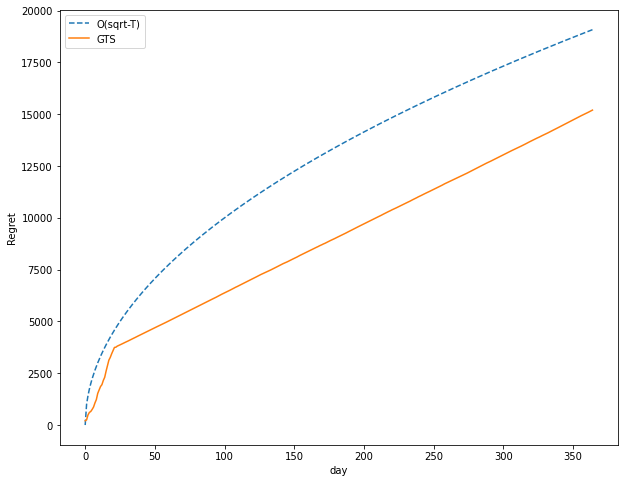

In [10]:
plt.figure(figsize=(10,8))
plt.ylabel("Regret")
plt.xlabel("day")
plt.plot(1000*np.sqrt(np.linspace(0,364,365)), '--')
for val in rewards_per_experiment.values():
    plt.plot(np.cumsum(np.mean(opt_value - val, axis=0)))

plt.legend(['O(sqrt-T)']+list(rewards_per_experiment.keys()))
plt.show()